In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go

In [2]:
#Function Definition Vector Field Angular Position

def field_points_angular_positions(number_of_particles=0):
    summation_thetas = []
    
    if (number_of_particles == 0):
        angular_spacing = 0
    elif (number_of_particles > 0):
        angular_spacing = 2 * np.pi/number_of_particles
    
    for i in range(number_of_particles):
        
        theta_i = i*angular_spacing
        summation_thetas.append(theta_i)
    return summation_thetas

In [3]:
#Function definition Vector Angular theta sets
#Function scope: This function is designed to give all the angular positions, velocity and acceleartion of all the particles
#figure out how to make sure the right variable type is put in the arguement
def vector_thetas_sets_with_drag(summation_thetas, summation_thetas_prime, summation_thetas_double_prime, time_step):
    
    summation_thetas_update = []
    summation_thetas_prime_update = []
    summation_thetas_double_prime_update = []
    
    net_thetas_double_prime_initial = sum(summation_thetas_double_prime) ##add up all the component angular acceleration
    
    number_of_particles = len(summation_thetas)
    
    for i in range(number_of_particles):
        #define the ith initial angular position, velocity, and acceleration
        theta_i_initial = summation_thetas[i]
        theta_i_prime_initial = summation_thetas_prime[i]
        theta_i_double_prime_initial = summation_thetas_double_prime[i]
        
        #updates the angular positions based on the current angular position and velocity
        theta_i_update = theta_i_initial + theta_i_prime_initial * time_step
        if theta_i_update >= -phi + 2 * np.pi:
            theta_i_update = -phi
        summation_thetas_update.append(theta_i_update)
        
        #updates the angular velocities based on current angular accelerations
        theta_i_prime_update = theta_i_prime_initial + net_thetas_double_prime_initial * time_step
        summation_thetas_prime_update.append(theta_i_prime_update)
        
        #updates the angular accelerations based on angular position and velocity
        
        for j in range(10000000000):
            if (theta_i_initial >= -phi +  2 * j * np.pi) and (theta_i_initial < phi + 2 * j * np.pi): #if in water
                theta_i_double_prime_update = F_0/(m*R)*(np.cos(theta_i_initial) - (coefficient_drag_water**2 + mechanical_friction)/2 * theta_i_prime_initial)
                summation_thetas_double_prime_update.append(theta_i_double_prime_update)
                break
            elif (theta_i_initial >= phi + 2 * j * np.pi) and (theta_i_initial < -phi + 2 * (j+1) * np.pi): #if not in water
                theta_i_double_prime_update = -(coefficient_drag_air + mechanical_friction)/2 * theta_i_prime_initial
                summation_thetas_double_prime_update.append(theta_i_double_prime_update)
                break
    
    return summation_thetas_update, summation_thetas_prime_update, summation_thetas_double_prime_update

In [4]:
##angular_rank_j is the jth angular position, velocity and acceleration

####theta sets is defined to theta_sets[i][j][k] #####
### i is the ith iteration of the time steps
### j is the jth component of angular set
### k is the kth particle

### water wheel data is defined to be waterwheel[l][m][n] #####
### l is are the number of iterations for the time steps 
### m is the mth number of particle
### n is the angular set or angular position, velocity and acceleration

#len(water_wheel_data) = len(theta_sets): therefor I = L#####
#len(water_wheel_data[m] = number_of_particles: therefor J =  N ####
#len(water_wheel_data[m][n]) = 3, there K = M#####

#### important findings, transforming the theta_sets array to water_wheel required transposing the 2nd and 3rd dimensions of theta_sets
#### since I is equal to L, the first for loop is equivalent
#### since m = k and j = n, the water_wheel[l][m][n][o][p] is equivalent theta_sets[i][n][m][p][o]#####

########I am going to call this transmutating a matrix

In [5]:
#i, j, and k are associated with the theta_sets
#creating the water wheeel requires using the subscripts l, m, and n 
def water_wheel_data_processing(theta_sets):
    I = len(theta_sets)
    J = len(theta_sets[0])
    K = len(theta_sets[0][0])

    L, M, N = I, K, J

    water_wheel = []
    for i in range(I): # I and L are equal
        water_wheel_state = []
        for m in range(M): #
            angular_set = []
            for n in range(N):
                angular_set.append(theta_sets[i][n][m])
                #print("angular_set = ", angular_set)
            water_wheel_state.append(angular_set)
        water_wheel.append(water_wheel_state)
    return water_wheel

In [6]:
def plot_particle_acceleration(particle_i_DF, i):
    columns_names = ["time", "Angular Position", "Angular Velocity", "Angular Acceleration"]
    fig_len= 500
    fig = go.Figure()
    fig.update_layout(title = "Number of Particles = " + str(number_of_particles) + ', Particle = ' + str(i), xaxis_title = 'time', yaxis_title = 'Radians',
                      height = fig_len, width = fig_len + 200)

    for i in range(3):
        fig.add_trace(go.Scatter(x=particle_i_DF[columns_names[0]], y = particle_i_DF[columns_names[i+1]], mode='lines', name=columns_names[i+1]))

    fig.add_hline(y = -phi, line_dash = 'dash', line_color = 'blue',
                    annotation_text = "-Phi", annotation_position="bottom right")
    fig.add_hline(y = phi, line_dash = 'dash', line_color = 'blue',
                    annotation_text = "+Phi", annotation_position="bottom right")
    
    return fig.show()

In [7]:
def particle_data_DF(water_wheel_DF, i):
    particle_i = []
    time = 0
    for j in range(len(water_wheel_DF)):
        particle_i.append([time, water_wheel_DF["Particle " + str(i)][j][0], water_wheel_DF["Particle " + str(i)][j][1], water_wheel_DF["Particle " + str(i)][j][2]])
        time += time_step
    columns_names = ["time", "Angular Position", "Angular Velocity", "Angular Acceleration"]
    particle_i_DF = pd.DataFrame(particle_i, columns = columns_names)
    return particle_i_DF

In [11]:
#Initializing independent parameters
a = 4
R = 5
F_0 = 5
m = 1
time = 0
time_final = 100
time_step = 0.1

#dependent parameters
phi = np.arccos(a/R)

#drag coefficients
coefficient_drag_water = 9/10
coefficient_drag_air = 2/10
mechanical_friction = 2/10

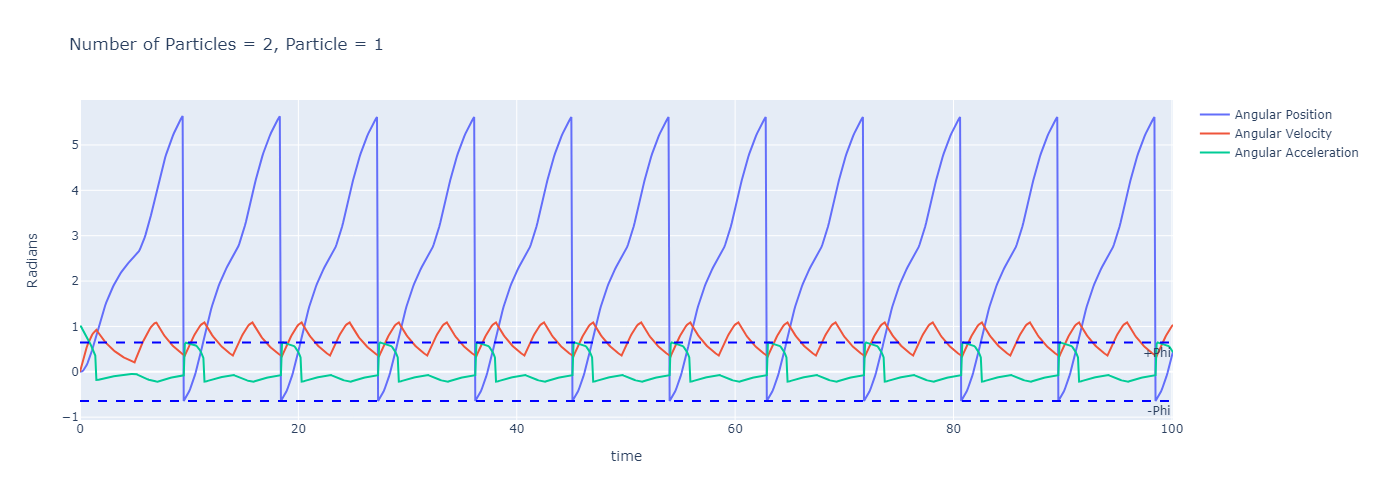

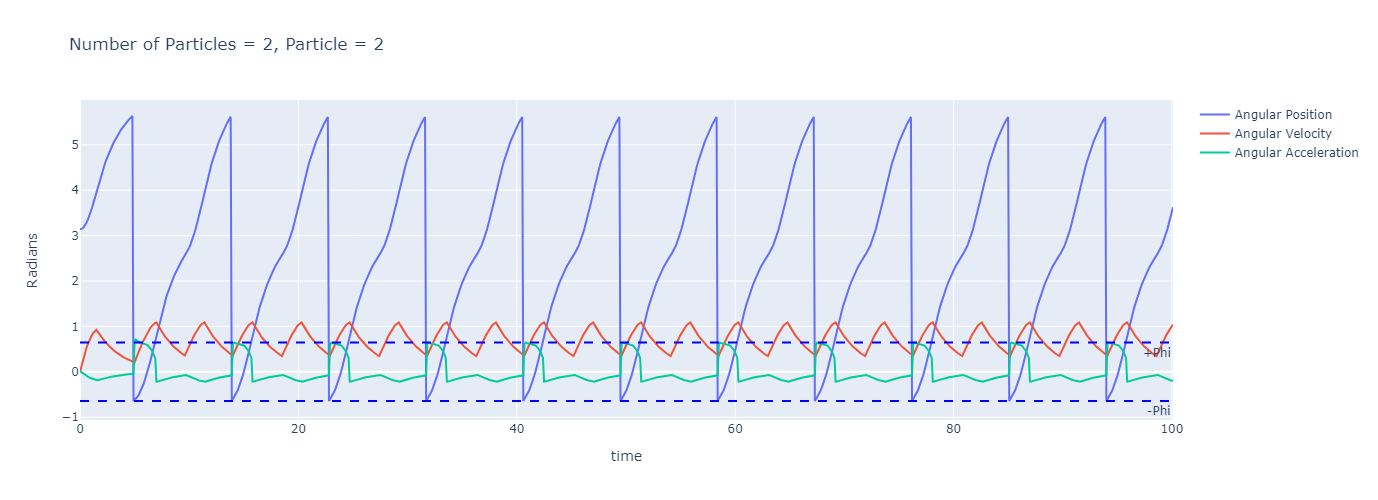

In [12]:
###the body of my program

#initializing angular position, velocity, and acceleration
number_of_particles = 2 #number of particles in the system

#initilize angular positions
summation_thetas = field_points_angular_positions(number_of_particles)

summation_thetas_prime = []
summation_thetas_double_prime = []

for i in range(number_of_particles):
    theta_i_initial = summation_thetas[i]
    theta_i_prime_initial = 0 #all particles all initially not moving in the water
    
    #initilize the angular velocities
    summation_thetas_prime.append(theta_i_prime_initial)
    
    #initilize angular acceleration
    for j in range(10000000000):
        if (theta_i_initial >= -phi +  2*j*np.pi) and (theta_i_initial < phi + 2*j*np.pi): ##if in water
            theta_i_double_prime_update = F_0/(m*R)*(np.cos(theta_i_initial) - (coefficient_drag_water + mechanical_friction)/2*theta_i_prime_initial) #river, friction and drag forces acting on particle i
            summation_thetas_double_prime.append(theta_i_double_prime_update)
            break
        elif (theta_i_initial >= phi + 2*j*np.pi) and (theta_i_initial < -phi + 2*(j+1)*np.pi): # if not in water
            theta_i_double_prime_update = -(coefficient_drag_water+mechanical_friction)/2*theta_i_prime_initial #friction and drag forces acting on particle i
            summation_thetas_double_prime.append(theta_i_double_prime_update)
            break

time = 0
theta_sets = [[summation_thetas, summation_thetas_prime, summation_thetas_double_prime]]
while time < time_final:
    summation_thetas, summation_thetas_prime, summation_thetas_double_prime = vector_thetas_sets_with_drag(summation_thetas, summation_thetas_prime, summation_thetas_double_prime, time_step)
    time = time + time_step
    theta_sets.append([summation_thetas, summation_thetas_prime, summation_thetas_double_prime])

time = 0
water_wheel_data = water_wheel_data_processing(theta_sets)

particle_numbering = []
for particle in range(number_of_particles):
    particle_numbering.append("Particle " + str(particle + 1))
    
water_wheel_DF = pd.DataFrame(water_wheel_data,columns = particle_numbering)
water_wheel_DF

k = 1
particle_5_DF = particle_data_DF(water_wheel_DF, k)
plot_particle_acceleration(particle_5_DF, k)

k = 2
particle_5_DF = particle_data_DF(water_wheel_DF, k)
plot_particle_acceleration(particle_5_DF, k)

# k = 3
# particle_5_DF = particle_data_DF(water_wheel_DF, k)
# plot_particle_acceleration(particle_5_DF, k)

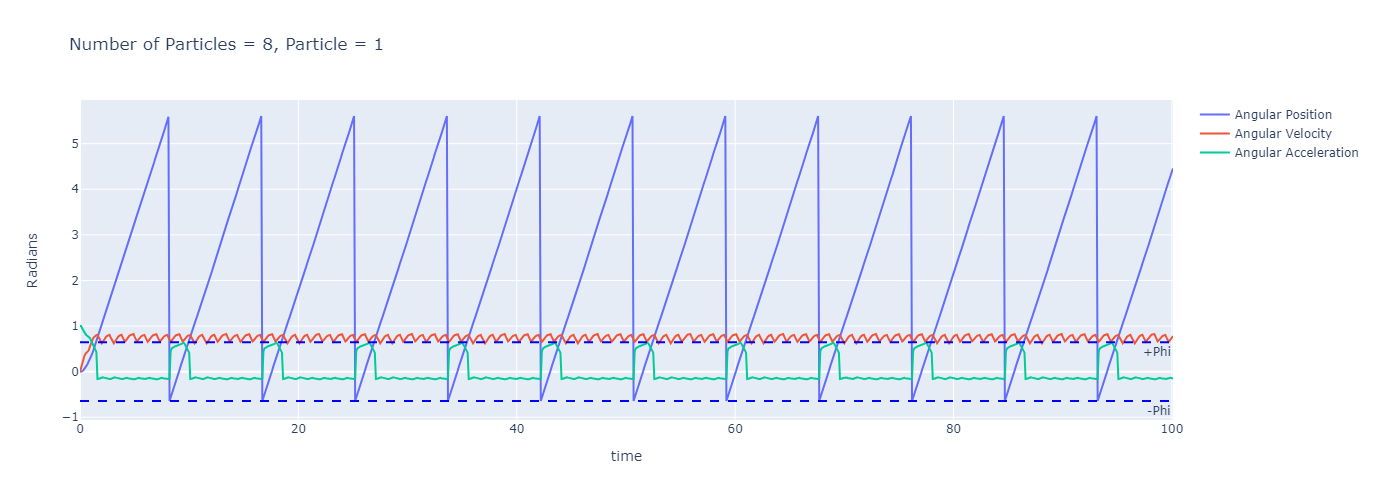

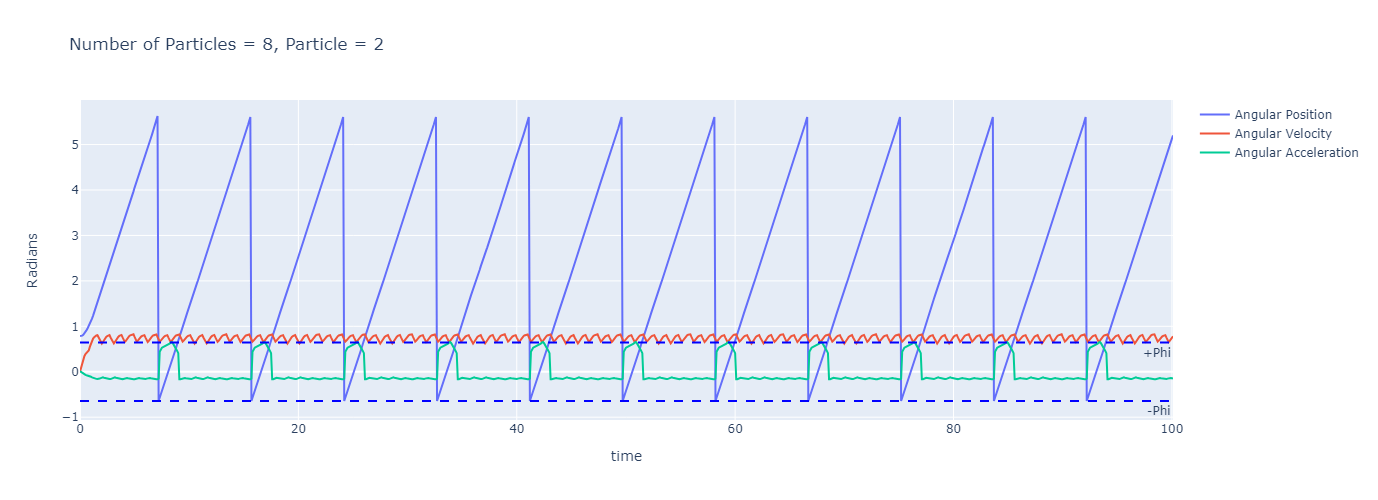

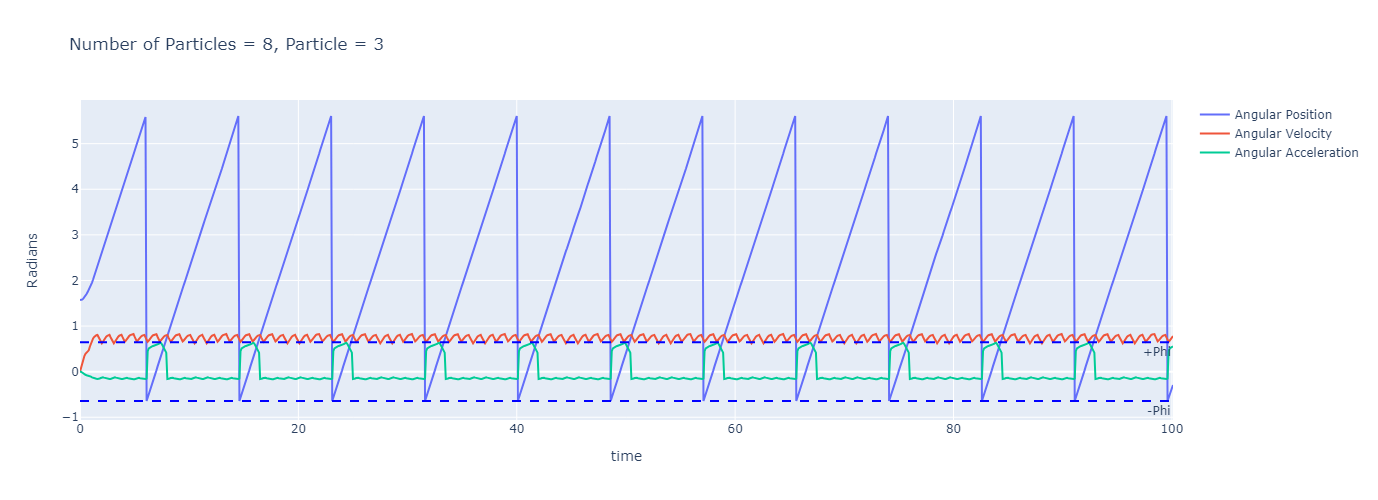

In [13]:
###the body of my program

#initializing angular position, velocity, and acceleration
number_of_particles = 8 #number of particles in the system

#initilize angular positions
summation_thetas = field_points_angular_positions(number_of_particles)

summation_thetas_prime = []
summation_thetas_double_prime = []

for i in range(number_of_particles):
    theta_i_initial = summation_thetas[i]
    theta_i_prime_initial = 0 #all particles all initially not moving in the water
    
    #initilize the angular velocities
    summation_thetas_prime.append(theta_i_prime_initial)
    
    #initilize angular acceleration
    for j in range(10000000000):
        if (theta_i_initial >= -phi +  2*j*np.pi) and (theta_i_initial < phi + 2*j*np.pi): ##if in water
            theta_i_double_prime_update = F_0/(m*R)*(np.cos(theta_i_initial) - (coefficient_drag_water + mechanical_friction)/2*theta_i_prime_initial) #river, friction and drag forces acting on particle i
            summation_thetas_double_prime.append(theta_i_double_prime_update)
            break
        elif (theta_i_initial >= phi + 2*j*np.pi) and (theta_i_initial < -phi + 2*(j+1)*np.pi): # if not in water
            theta_i_double_prime_update = -(coefficient_drag_water+mechanical_friction)/2*theta_i_prime_initial #friction and drag forces acting on particle i
            summation_thetas_double_prime.append(theta_i_double_prime_update)
            break

time = 0
theta_sets = [[summation_thetas, summation_thetas_prime, summation_thetas_double_prime]]
while time < time_final:
    summation_thetas, summation_thetas_prime, summation_thetas_double_prime = vector_thetas_sets_with_drag(summation_thetas, summation_thetas_prime, summation_thetas_double_prime, time_step)
    time = time + time_step
    theta_sets.append([summation_thetas, summation_thetas_prime, summation_thetas_double_prime])

time = 0
water_wheel_data = water_wheel_data_processing(theta_sets)

particle_numbering = []
for particle in range(number_of_particles):
    particle_numbering.append("Particle " + str(particle + 1))
    
water_wheel_DF = pd.DataFrame(water_wheel_data,columns = particle_numbering)
water_wheel_DF

k = 1
particle_5_DF = particle_data_DF(water_wheel_DF, k)
plot_particle_acceleration(particle_5_DF, k)

k = 2
particle_5_DF = particle_data_DF(water_wheel_DF, k)
plot_particle_acceleration(particle_5_DF, k)

k = 3
particle_5_DF = particle_data_DF(water_wheel_DF, k)
plot_particle_acceleration(particle_5_DF, k)